In [9]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Function for loading the data
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

In [4]:
#loading the train and the test data
df_train = wrangle(r"C:\Users\User\Desktop\Completed\House_Price_Prediction\train.csv")
df_test = wrangle(r"C:\Users\User\Desktop\Completed\House_Price_Prediction\test.csv")

In [5]:
# Display the first 5 column of the train dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# To exploreinformation about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# To calculate missing values and convert hem to a percentage
df_train_missing = (df_train.isna().sum()) / 1460 * 100
df_train_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [195]:
# Export DataFrame into a csv
df_train_missing.to_csv('train missing value.csv')

# Read the csv file 
x = pd.read_csv('train missing value.csv')

# Filter data that have missing values in colmn zero
x[x['0'] > 0]

,Unnamed: 0,0
3,LotFrontage,17.739726
6,Alley,93.767123
25,MasVnrType,59.726027
26,MasVnrArea,0.547945
30,BsmtQual,2.534247
31,BsmtCond,2.534247
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
35,BsmtFinType2,2.602740
42,Electrical,0.068493


In [196]:
# Droping colums with alot missing values
df_train.drop(columns=["Id", "Alley", "PoolQC", "Fence", "MiscFeature", "MasVnrType","FireplaceQu"], inplace =True)
df_train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [197]:
df_ta = df_train.nunique()
# Export DataFrame into a csv
df_ta.to_csv('train unique.csv')

# Read the csv file 
z = pd.read_csv('train unique.csv')

# Filter data that have missing values in colmn zero
z[z['0'] > 700]

,Unnamed: 0,0
3,LotArea,1073
34,BsmtUnfSF,780
35,TotalBsmtSF,721
40,1stFlrSF,753
43,GrLivArea,861


In [199]:
#Dropig multicolinearlity columns
df_train.drop(columns=["LotArea", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "GrLivArea"])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [200]:
df_train.shape

(1460, 74)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


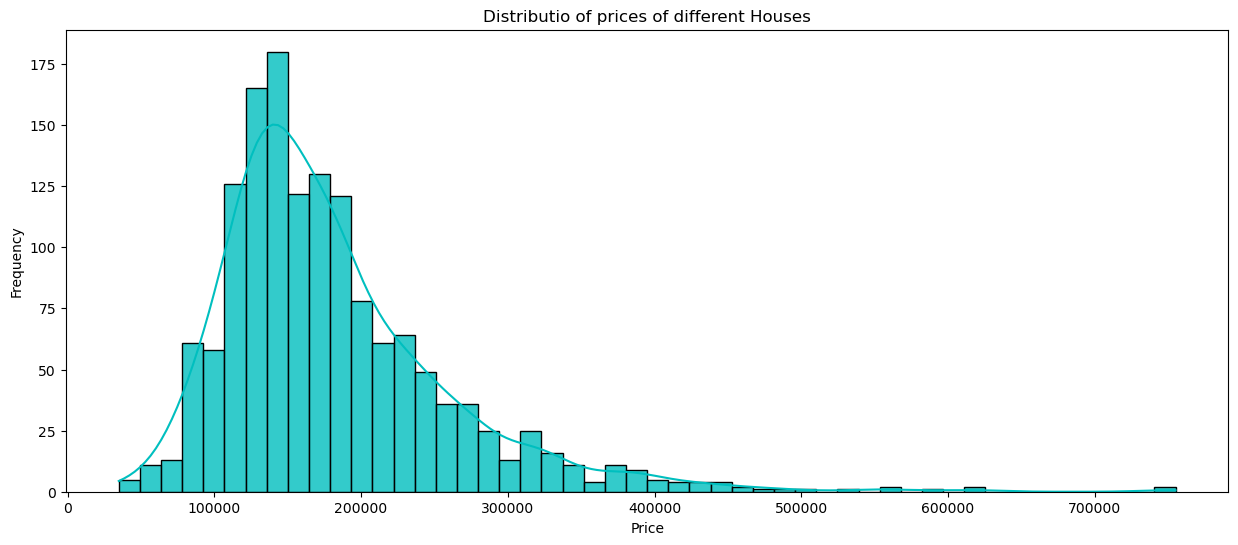

In [201]:
# Print descriptive statistics
print(df_train["SalePrice"].describe())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Create the histogram with KDE
sns.histplot(df_train["SalePrice"], color="c", bins=50, kde=True, ax=ax, alpha=0.8)

# Adding a title
plt.title("Distributio of prices of different Houses");

#Labelling the axis
plt.ylabel("Frequency");
plt.xlabel("Price");

# Show the plot
plt.show();

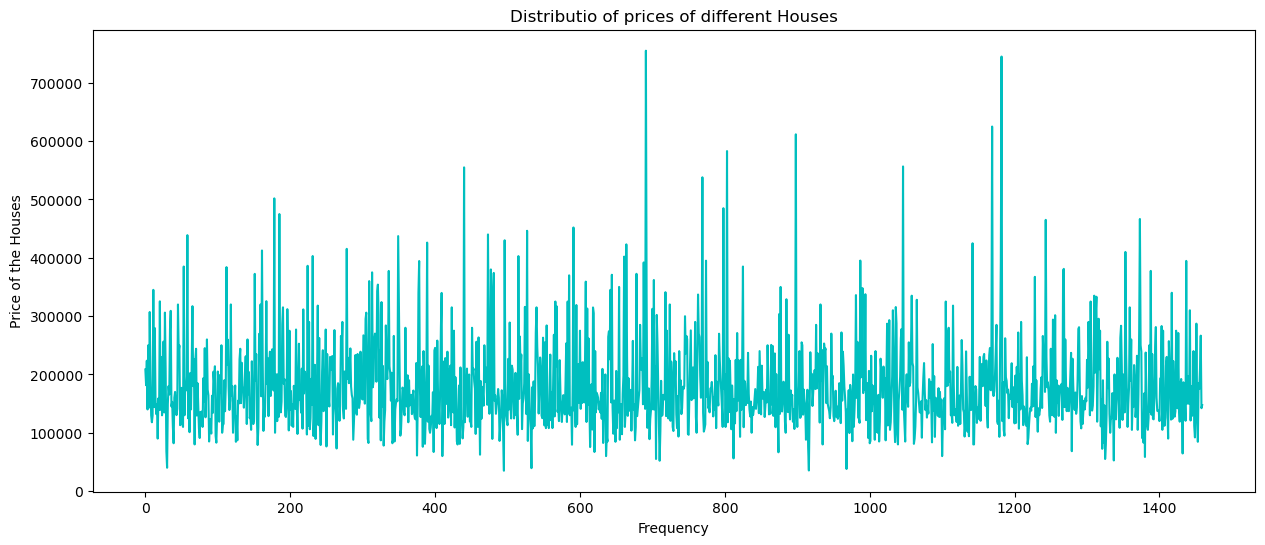

In [166]:
# Create axis
fig, ax = plt.subplots(figsize=(15, 6))

# Create a plot
plt.plot(df_train["SalePrice"], color="c")

# Adding a title

plt.title("Distributio of prices of different Houses");

#Labelling the axis
plt.ylabel("Price of the Houses");
plt.xlabel("Frequency");

# Show the plot
plt.show();

In [202]:
# Droping the null values in the target'SalePrice'
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

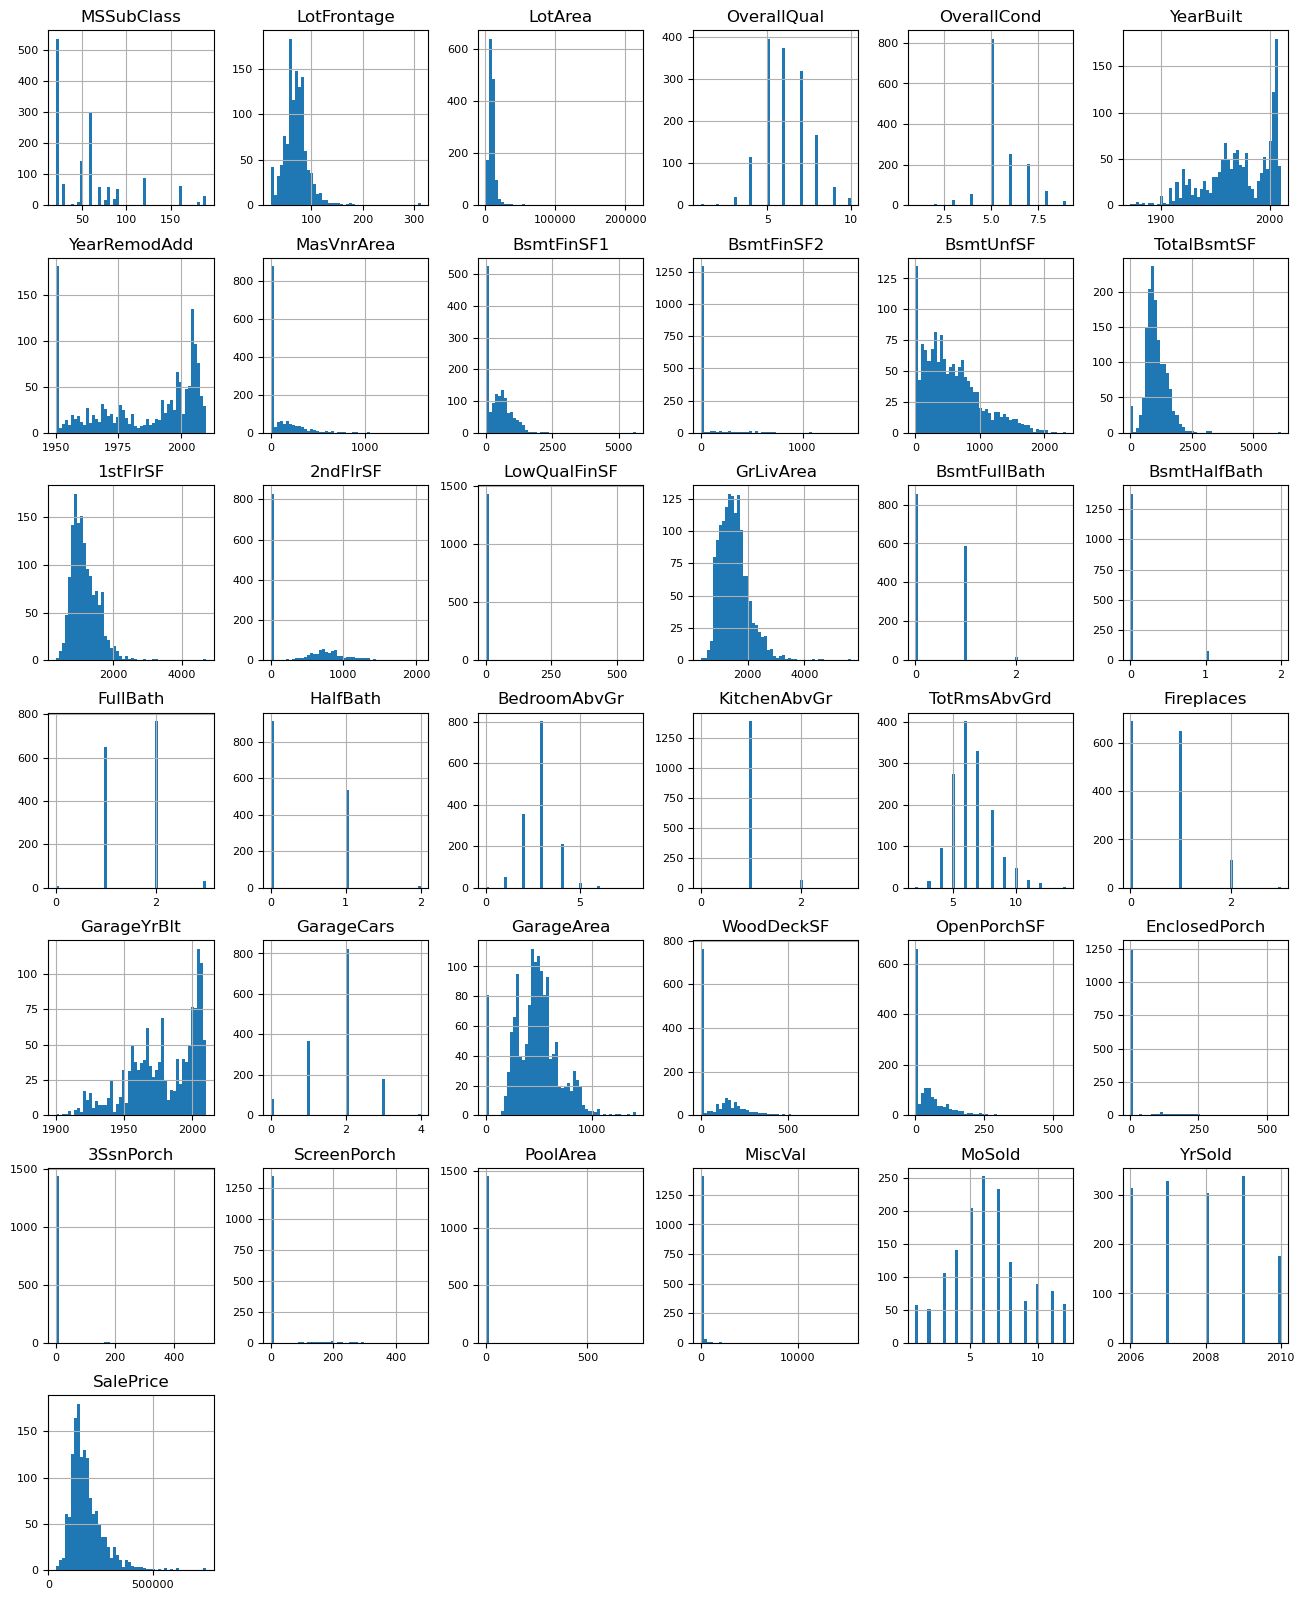

In [203]:
# The distribution of the numerical data
df_num.hist(figsize=(16,20),bins=50, xlabelsize=8, ylabelsize=8);

In [206]:
# Sepparating the numerical values from the dataset
df_num = df_train.select_dtypes(include =["float64", "int64"])
df_cate = df_train.select_dtypes(include = ["object"])

# impute missing numerical values
imputer_nume = SimpleImputer(strategy='median')
df_imputed_nume = pd.DataFrame(imputer_nume.fit_transform(df_num), columns=df_num.columns)

# Impute missing categorical values
imputer_categ = SimpleImputer(strategy = "most_frequent")
df_imputed_categ = pd.DataFrame(imputer_categ.fit_transform(df_cate), columns=df_cate.columns)

# To concat the imputed datasets
df_imputed = pd.concat([df_imputed_nume, df_imputed_categ], axis=1)

In [207]:
df_imputed.shape

(1460, 74)

In [208]:
# To define eature and target
y = df_imputed["SalePrice"]
X = df_imputed.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [209]:
# To splt data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [213]:
# Linear regression mode
model_lin = LinearRegression()

# To train the model using the training data
model_lin.fit(X_train, y_train)

# To make predictions using liner regression model
y_pred = model_lin.predict(X_test)

# Evaluate the model
print(f"Mean absolute error using Linear Regression:{round(mean_absolute_error(y_test, y_pred),2)}")


Mean absolute error using Linear Regression:22975.86


In [211]:
# Decision tree model
model_2 = DecisionTreeRegressor()

# To train the model using the training data
model_2.fit(X_train, y_train)

# To make predictions using liner regression model
y_pred_1 = model_2.predict(X_test)

# Evaluate the model
print(f"Mean absolute error using Decision Tree: {round(mean_absolute_error(y_test, y_pred1),2)}")


Mean absolute error using Decision Tree: 26244.64


In [212]:
# Random Forest model
model_3 = RandomForestRegressor(n_estimators=100, max_depth=10)

# To train the model using the training data
model_3.fit(X_train, y_train)

# To make predictions using liner regression model
y_pred_2 = model_3.predict(X_test)

# Evaluate the model
print(f"Mean absolute error using Random forest: {round(mean_absolute_error(y_test, y_pred_2),2)}")


Mean absolute error using Random forest: 18417.53
